## Problem Statement

In [397]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

In [398]:
#Importing dataset
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [399]:
day.shape

(730, 16)

In [400]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [401]:
# Convert Date Column to datetime 
day['dteday'] = pd.to_datetime(day['dteday'])
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [402]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [403]:
# Mapping encoded seasons to actual seasons and encoded weathersit to actual weathersit
day['season'] = day['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
day['weathersit'] = day['weathersit'].map({1:'clear', 2:'mist ', 3:'light_snow', 4:'heavy_rain'})

day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [404]:
# Dropping instant since it is basically an index
day.drop('instant',axis = 1, inplace = True)

In [405]:
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [406]:
day['weathersit'].replace(('mist ','mist'), inplace = True)

In [407]:
# Creating dummies from season and weathersit
day = pd.get_dummies(day, columns=['season'])
day = pd.get_dummies(day, columns=['weathersit'])
day.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_fall,season_spring,season_summer,season_winter,weathersit_clear,weathersit_light_snow,weathersit_mist
0,2018-01-01,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0,0,0,0,1
1,2018-02-01,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0,0,0,0,1
2,2018-03-01,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,0,1,0,0
3,2018-04-01,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,0,1,0,0
4,2018-05-01,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,0,1,0,0


In [408]:
# Dropping dteday column since that information is present in yr, mnth, holiday, weekday, and workingday columns
day.drop('dteday', axis = 1, inplace = True)
day.drop('season_winter', axis = 1, inplace = True)
day.drop('weathersit_light_snow', axis = 1, inplace = True)
day.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_fall,season_spring,season_summer,weathersit_clear,weathersit_mist
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0,0,1
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0,0,1
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,1,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,1,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,1,0


### Data Pre-Processing

In [409]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [410]:
# Train test split
np.random.seed(0)
day_train, day_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [411]:
numVar = ['temp','atemp','hum','windspeed','mnth','weekday','cnt']

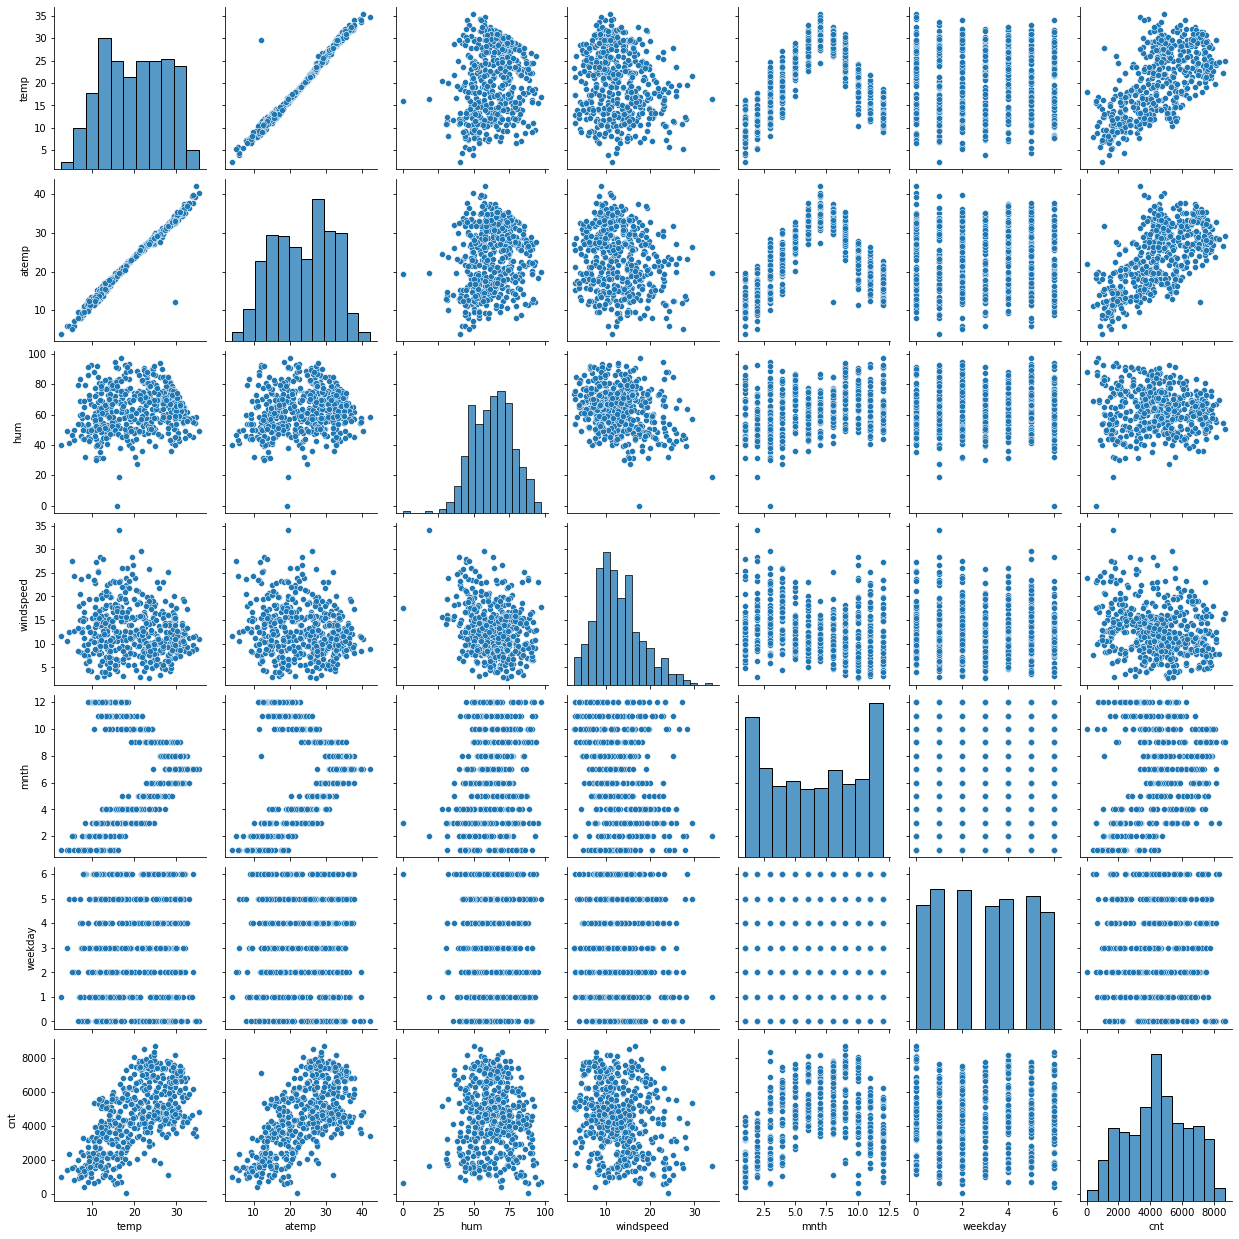

In [412]:
# Plotting a pairplot to visualize relationship between independent and target variables
sns.pairplot(day_train[numVar])
plt.show()

In [413]:
# Rescaling numerical features using min-max scaler
scaler = MinMaxScaler()

day_train[numVar] = scaler.fit_transform(day_train[numVar])
day_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_fall,season_spring,season_summer,weathersit_clear,weathersit_mist
653,1,0.818182,0,0.500000,1,0.509887,0.501133,0.575354,0.300794,922,6612,0.864243,0,0,0,1,0
576,1,0.545455,0,0.500000,1,0.815169,0.766351,0.725633,0.264686,968,6248,0.827658,1,0,0,1,0
426,1,0.181818,0,0.000000,0,0.442393,0.438975,0.640189,0.255342,956,3110,0.465255,0,1,0,1,0
728,1,1.000000,0,0.166667,1,0.245101,0.200348,0.498067,0.663106,364,1432,0.204096,0,1,0,1,0
482,1,0.272727,0,0.000000,0,0.395666,0.391735,0.504508,0.188475,1120,3100,0.482973,0,0,1,1,0


In [414]:
day_test[numVar] = scaler.transform(day_test[numVar])
day_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_fall,season_spring,season_summer,weathersit_clear,weathersit_mist
184,0,0.545455,1,0.500000,0,0.831783,0.769660,0.657364,0.084219,3065,2978,0.692706,1,0,0,1,0
535,1,0.454545,0,0.666667,1,0.901354,0.842587,0.610133,0.153728,872,5339,0.712034,0,0,1,1,0
299,0,0.818182,0,1.000000,0,0.511964,0.496145,0.837699,0.334206,240,2419,0.303382,0,0,0,1,0
221,0,0.636364,0,0.833333,1,0.881625,0.795343,0.437098,0.339570,884,3896,0.547400,1,0,0,1,0
152,0,0.454545,0,1.000000,0,0.817246,0.741471,0.314298,0.537414,736,4232,0.569029,0,0,1,1,0


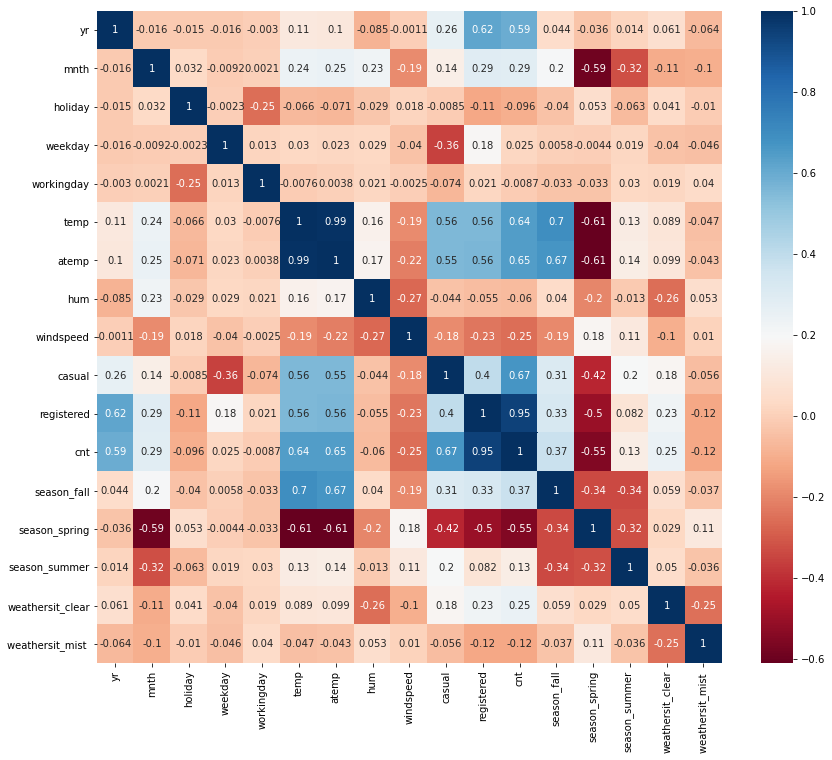

In [415]:
# Plotting a heatmap to find correlations between independent variables
corr_df = day_train.corr()

plt.figure(figsize = [14,12])
sns.heatmap(corr_df, cmap = 'RdBu', annot = True)
plt.show()

Following predictor variables are highly correlated:
- weather_mist & weather_clear
- temp & atemp
- season_winter & month
- season_fall & temp
- season_fall & atemp

We should expect a high VIF value and a high p-value for some of these variables when building a model

We can also see that there is major correlation between:
- year, temp, atemp, and season_spring
We should expect large and significant coefficients corresponding to these variables in our model

In [416]:
# Predictors
X_train = day_train[[col for col in day_train.columns if col not in ['casual','registered','cnt']]]
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_fall,season_spring,season_summer,weathersit_clear,weathersit_mist
653,1,0.818182,0,0.500000,1,0.509887,0.501133,0.575354,0.300794,0,0,0,1,0
576,1,0.545455,0,0.500000,1,0.815169,0.766351,0.725633,0.264686,1,0,0,1,0
426,1,0.181818,0,0.000000,0,0.442393,0.438975,0.640189,0.255342,0,1,0,1,0
728,1,1.000000,0,0.166667,1,0.245101,0.200348,0.498067,0.663106,0,1,0,1,0
482,1,0.272727,0,0.000000,0,0.395666,0.391735,0.504508,0.188475,0,0,1,1,0


In [417]:
X_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_fall,season_spring,season_summer,weathersit_clear,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.491830,0.711765,0.537262,0.512989,0.650369,0.320768,0.262745,0.243137,0.245098,0.939216,0.003922
std,0.500429,0.315338,0.157763,0.329528,0.453386,0.225844,0.212385,0.145882,0.169797,0.440557,0.429398,0.430568,0.239169,0.062561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Creating first model using all independent variables

Since Boombikes wants to understand the complete market demand for shared bikes, we will use cnt, that is, the total number of number of rental bikes for that day. However, if the company wants to dive deeper into the number of registered or casual users. The codel can be built again using the the respective target variables. 

In [418]:
y_train = day_train.pop('cnt')

In [419]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     160.7
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          7.79e-174
Time:                        17:36:03   Log-Likelihood:                 475.34
No. Observations:                 510   AIC:                            -920.7
Df Residuals:                     495   BIC:                            -857.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2663      0.045  

Variables with high p-value:
- mnth
- weekday
- atemp
- season_fall

#### Let's do a VIF analysis to check for multicollinearity

In [420]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,388.81
6,atemp,369.51
7,hum,17.39
12,weathersit_clear,14.44
1,mnth,10.40
9,season_fall,5.19
10,season_spring,5.00
8,windspeed,4.77
11,season_summer,4.68
4,workingday,3.68


#### Meaning of infinite VIF value
An infinite VIF value indicates that the corresponding variable may be expressed exactly by a linear combination of other variables (which show an infinite VIF as well). [Source: https://www.programsbuzz.com/]

This is because season and weather dummy variables should be (n-1) not n where n is the levels of the categorical variables. (Code updated above)

In [421]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,388.81
6,atemp,369.51
7,hum,17.39
12,weathersit_clear,14.44
1,mnth,10.40
9,season_fall,5.19
10,season_spring,5.00
8,windspeed,4.77
11,season_summer,4.68
4,workingday,3.68


In [422]:
# Re-run the model after dropping mnth variable
X_train_lm = X_train.drop(['mnth','atemp','weekday'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Print a summary of the linear regression model obtained
print(lr.summary())

            Features    VIF
3               temp  21.30
9   weathersit_clear  12.80
4                hum  12.49
6        season_fall   4.29
5          windspeed   4.27
2         workingday   3.64
8      season_summer   2.40
7      season_spring   2.32
0                 yr   2.07
1            holiday   1.11
10  weathersit_mist    1.09
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     204.0
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          1.77e-176
Time:                        17:36:04   Log-Likelihood:                 473.45
No. Observations:                 510   AIC:                            -922.9
Df Residuals:                     498   BIC:                            -872.1
Df Model:                       

Decision: atemp and mnth were clearly not significant based on hypothesis testing. temp, hum, and weathersit_clear have high VIF value but are are significant according to the model.

### RFE Model

In [423]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [424]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_fall,season_spring,season_summer,weathersit_clear,weathersit_mist
653,1,0.818182,0,0.500000,1,0.509887,0.501133,0.575354,0.300794,0,0,0,1,0
576,1,0.545455,0,0.500000,1,0.815169,0.766351,0.725633,0.264686,1,0,0,1,0
426,1,0.181818,0,0.000000,0,0.442393,0.438975,0.640189,0.255342,0,1,0,1,0
728,1,1.000000,0,0.166667,1,0.245101,0.200348,0.498067,0.663106,0,1,0,1,0
482,1,0.272727,0,0.000000,0,0.395666,0.391735,0.504508,0.188475,0,0,1,1,0


In [425]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 11)             
rfe = rfe.fit(X_train, y_train)

In [426]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 4),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_fall', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('weathersit_clear', True, 1),
 ('weathersit_mist ', True, 1)]

In [427]:
X_train.columns[rfe.support_]

Index(['yr', 'mnth', 'holiday', 'temp', 'hum', 'windspeed', 'season_fall',
       'season_spring', 'season_summer', 'weathersit_clear',
       'weathersit_mist '],
      dtype='object')

In [428]:
X_train.columns[~rfe.support_]

Index(['weekday', 'workingday', 'atemp'], dtype='object')

In [429]:
col = list(X_train.columns[rfe.support_])

# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,mnth,holiday,temp,hum,windspeed,season_fall,season_spring,season_summer,weathersit_clear,weathersit_mist
653,1,0.818182,0,0.509887,0.575354,0.300794,0,0,0,1,0
576,1,0.545455,0,0.815169,0.725633,0.264686,1,0,0,1,0
426,1,0.181818,0,0.442393,0.640189,0.255342,0,1,0,1,0
728,1,1.000000,0,0.245101,0.498067,0.663106,0,1,0,1,0
482,1,0.272727,0,0.395666,0.504508,0.188475,0,0,1,1,0


In [430]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lr_rfe = sm.OLS(y_train,X_train_rfe).fit() 

print(lr_rfe.summary())

            Features    VIF
3               temp  22.02
4                hum  16.73
9   weathersit_clear  13.87
1               mnth  10.27
6        season_fall   5.05
7      season_spring   4.91
8      season_summer   4.64
5          windspeed   4.54
0                 yr   2.07
10  weathersit_mist    1.08
2            holiday   1.04
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          3.07e-176
Time:                        17:36:04   Log-Likelihood:                 472.88
No. Observations:                 510   AIC:                            -921.8
Df Residuals:                     498   BIC:                            -871.0
Df Model:                       

### Evaluating the model on the test set

#### Residual analysis of backwards feature elimination model

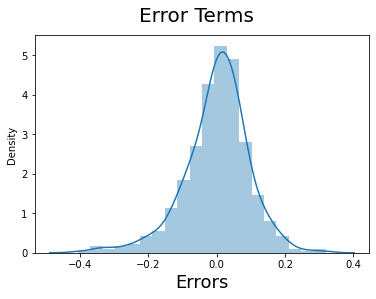

In [431]:
y_train_pred = lr.predict(X_train_lm)

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)    

plt.show()

#### Residual analysis of RFE model

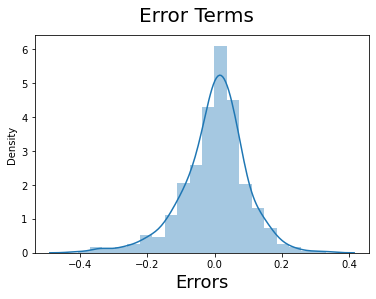

In [432]:
y_train_pred = lr_rfe.predict(X_train_rfe)

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)    

plt.show()

#### Evaluating backwards elimination model on test set

In [433]:
ind_var = [i for i in list(day_test.columns) if i not in ['mnth','atemp','weekday','casual','registered','cnt']]

y_test = day_test['cnt']
X_test = day_test[ind_var]

In [434]:
X_test_lm = sm.add_constant(X_test)

y_test_pred_lm = lr.predict(X_test_lm)
y_test_pred_rfe = lr_rfe.predict(X_test_lm)

In [435]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred_lm)

0.8067606586530676

In [436]:
r2_score(y_test, y_test_pred_rfe)

0.6671866451614276